<a href="https://colab.research.google.com/github/nicolly-sak/HD-emg-analysis/blob/main/PDPD3_1_Gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pickle 
from matplotlib import pylab
from google.colab import widgets
import scipy.signal
!pip install hickle
import hickle

!pip install --upgrade numpy
import h5py
!pip install --upgrade tbb

In [ ]:
df_dict = hickle.load('/content/drive/MyDrive/PDPD/Dicionário/df_dict.hkl')
dados13 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados13.h5", "r+")
dados14 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados14.h5", "r+")
dados15 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados15.h5", "r+")
dados16 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados16.h5", "r+")
dados17 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados17.h5", "r+")
dados18 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados18.h5", "r+")
dados19 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados19.h5", "r+")
dados20 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados20.h5", "r+")
dados21 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados21.h5", "r+")
dados22 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados22.h5", "r+")
dados23 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados23.h5", "r+")
dados24 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados24.h5", "r+")
dados25 = h5py.File("/content/drive/MyDrive/PDPD/Dicionário/dados25.h5", "r+")

In [ ]:
#função para escolher cada caracteristica desejada

def selecionar(df, subjx = "todos", sessionx= "todos", speedx= "todos", movementx= "todos") :
  print("subj: "+ subjx)
  queryexpression= " "
  if subjx != "todos" :
    queryexpression= queryexpression + 'subj == "'+ subjx +'" &' 
  if sessionx != "todos" :
    queryexpression= queryexpression + ' session =='+ str(sessionx) + '&'
  if speedx != "todos" :
    queryexpression= queryexpression + ' speed =="'+ speedx + '" &'
  elif movementx == 'todos' :
    if queryexpression[-1].find("&") == 0:
      queryexpression= queryexpression[0:-1]
  if movementx != "todos" :
    queryexpression= queryexpression +  ' movement =="'+ movementx +'"'   
  else :
    if queryexpression[-1].find("&") == 0:
      queryexpression= queryexpression[0:-1]

  if queryexpression == " ":
    w= df   
  else:
    w= df.query(queryexpression)
  
  print(queryexpression)
  
  return w

In [ ]:
#teste
selecionar(df_dict[25], movementx= "point")

subj: todos
  movement =="point"


,subj,session,speed,movement,caminho,Age,Gender,Dominant Hand
8,subj25,3,fast,point,-,18.0,M,R
13,subj25,3,fast,point,-,18.0,M,R
18,subj25,1,slow,point,-,18.0,M,R
21,subj25,1,slow,point,-,18.0,M,R
42,subj25,2,slow,point,-,18.0,M,R
47,subj25,2,slow,point,-,18.0,M,R
48,subj25,1,fast,point,-,18.0,M,R
53,subj25,1,slow,point,-,18.0,M,R
63,subj25,3,slow,point,-,18.0,M,R
66,subj25,3,slow,point,-,18.0,M,R


In [ ]:
#funçao para plotar os grafico dos itens selecionados

def plotar_grafico_emg(emgy, query, dados) :
  tb = widgets.TabBar([str(i) for i in range(len(query)) ])
  for j in range(len(query)):
    i = query.index[j]
    emg= emgy
    emg= emg+" "
    emgx=np.where(dados['/'+str(i) +'/channels_emg'][0]==emg )[0][0]
    
    w=dados['/'+str(i) +'/emg'][emgx].shape[0]
    
    t= 1/2048
    x= np.arange(0,w,1)*(t)
    y=dados['/'+str(i) +'/emg'][emgx]

    with tb.output_to(j, select=(j == 0)):
      pylab.plot(x, y)
      pylab.show()

subj: todos
  movement =="point"
18
subj: todos
  movement =="point"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

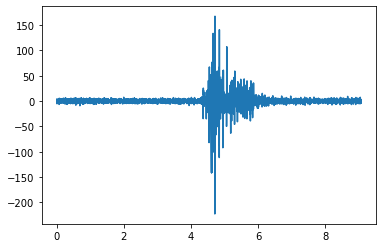

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

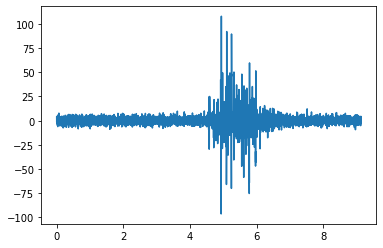

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

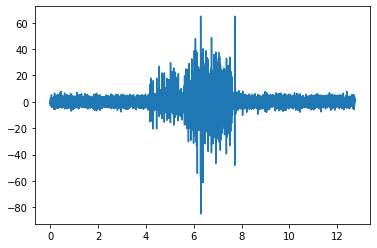

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

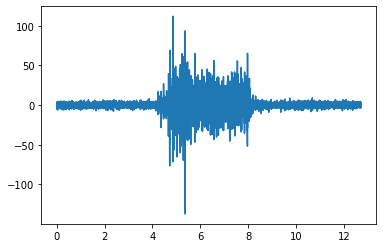

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

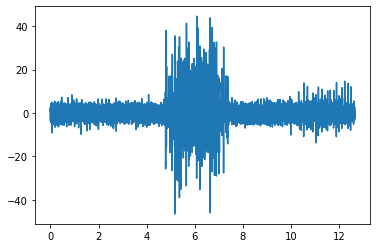

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

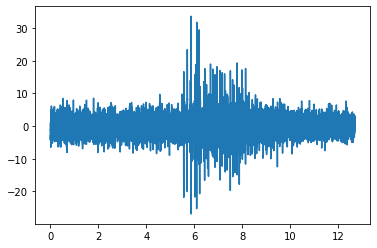

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

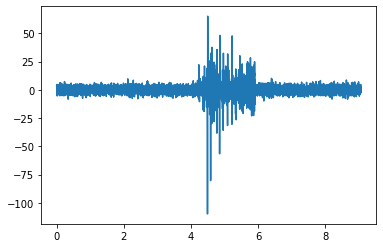

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

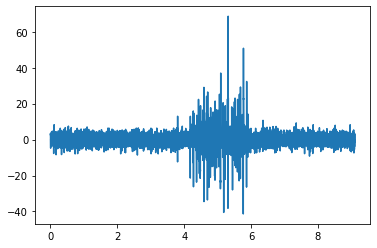

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

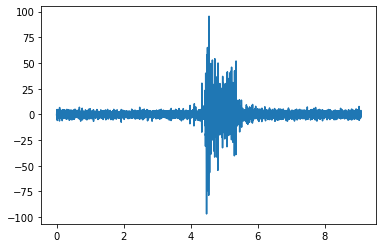

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

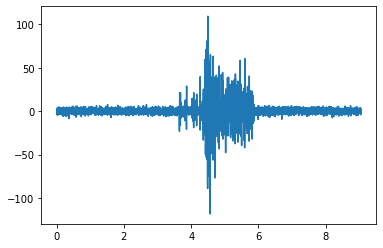

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

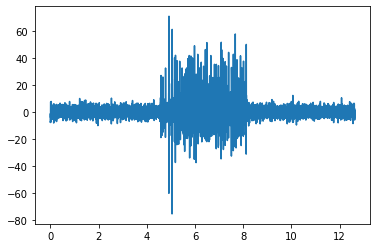

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

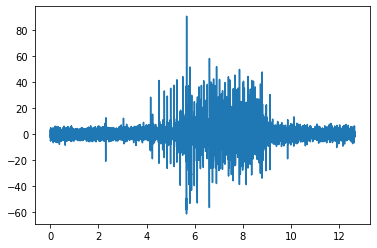

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

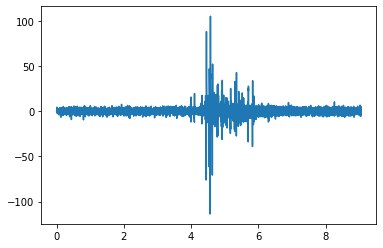

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

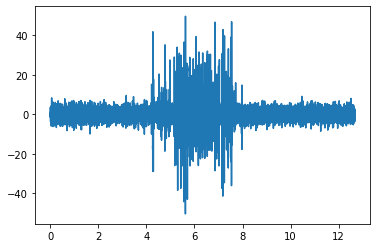

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

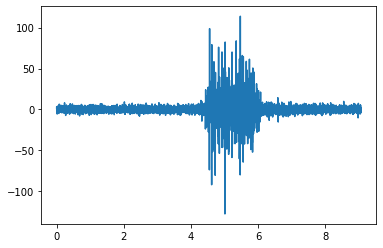

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

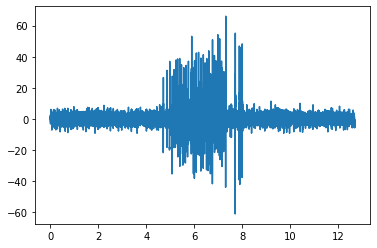

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

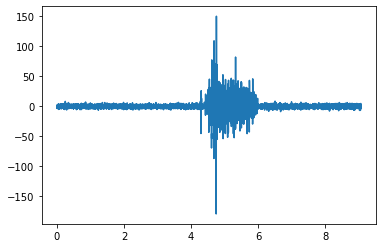

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

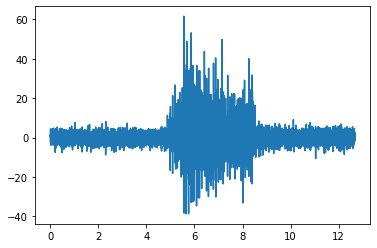

<IPython.core.display.Javascript object>

In [ ]:
#teste
#ver quantas tabelas devem ser plotadas
quantidade= len(selecionar(df_dict[13], movementx= "point"))
print(quantidade)

#plotar os graficos
plotar_grafico_emg("MA1", selecionar(df_dict[13], movementx= "point"), dados13)

In [ ]:
colunas= ['subj','session','speed','movement', 'Age', 'Gender', 'Dominant Hand', 'emg', 'Desvio Padrao', 'Variancia', 'Amplitude']
tabela_estatisticas= pd.DataFrame(columns=colunas)

def estatisticas_dados_emg(emgy, query, dados) :
  print(emgy)
  for j in range(len(query)):
    i = query.index[j]
    emg= emgy
    emg= emg+" "
    emgx= np.where(dados['/'+str(i) +'/channels_emg'][0]==emg )[0][0]
    desvio_padrao= dados['/'+str(i) +'/emg'][emgx].std()
    variancia= dados['/'+str(i) +'/emg'][emgx].var()
    amplitude= dados['/'+str(i) +'/emg'][emgx].max() - dados['/'+str(i) +'/emg'][emgx].min()
    print("Desvio padrao: ", desvio_padrao, "Variancia: ", variancia, "Amplitude: ", amplitude)

    tabela_estatisticas.loc[j, 'Desvio Padrao']= desvio_padrao

    tabela_estatisticas.loc[j, 'Variancia']= variancia

    tabela_estatisticas.loc[j, 'Amplitude']= amplitude

    tabela_estatisticas.loc[j, 'emg']= emg   


    if ((dados['/' + str(i) + '/session'][0][0])==1):
      tabela_estatisticas.loc[j,'session']= 1
    elif ((dados['/' + str(i)+'/session'][0][0])==2) :
      tabela_estatisticas.loc[j,'session']= 2    
    else :
      tabela_estatisticas.loc[j,'session']= 3

    if ((dados['/' + str(i) +'/speed'][0])=='slow') :
      tabela_estatisticas.loc[j,'speed']= 'slow'
    else :
      tabela_estatisticas.loc[j,'speed']= 'fast'

    tabela_estatisticas.loc[j, 'subj']= dados['/' + str(i) +'/subject'][0]

    tabela_estatisticas.loc[j, 'movement']= dados['/' + str(i) +'/movement'][0]

   
    tabela_estatisticas.loc[j, 'Age']= query.loc[i, 'Age']

    tabela_estatisticas.loc[j, 'Gender']= query.loc[i, 'Gender']

    tabela_estatisticas.loc[j, 'Dominant Hand']= query.loc[i, 'Dominant Hand']

In [ ]:
#teste
estatisticas_dados_emg("MA1", selecionar(df_dict[13], movementx= "point"), dados13) 
tabela_estatisticas

subj: todos
  movement =="point"
MA1
Desvio padrao:  10.479298 Variancia:  109.815674 Amplitude:  389.89337
Desvio padrao:  6.810101 Variancia:  46.377476 Amplitude:  204.3133
Desvio padrao:  5.5296273 Variancia:  30.576778 Amplitude:  149.95905
Desvio padrao:  8.055634 Variancia:  64.893234 Amplitude:  249.24002
Desvio padrao:  4.6568813 Variancia:  21.686543 Amplitude:  90.89815
Desvio padrao:  3.0376298 Variancia:  9.227195 Amplitude:  60.544395
Desvio padrao:  5.4806013 Variancia:  30.036993 Amplitude:  174.9642
Desvio padrao:  4.208732 Variancia:  17.713427 Amplitude:  110.028534
Desvio padrao:  6.2677045 Variancia:  39.284122 Amplitude:  192.26889
Desvio padrao:  7.6413064 Variancia:  58.389565 Amplitude:  227.89417
Desvio padrao:  5.8769517 Variancia:  34.53856 Amplitude:  146.0134
Desvio padrao:  6.5329957 Variancia:  42.680035 Amplitude:  152.47037
Desvio padrao:  5.8678184 Variancia:  34.431293 Amplitude:  218.72398
Desvio padrao:  4.9498525 Variancia:  24.501038 Amplitude:  

,subj,session,speed,movement,Age,Gender,Dominant Hand,emg,Desvio Padrao,Variancia,Amplitude
0,subj13,1,fast,point,29,M,R,MA1,10.4793,109.816,389.893
1,subj13,1,fast,point,29,M,R,MA1,6.8101,46.3775,204.313
2,subj13,3,slow,point,29,M,R,MA1,5.52963,30.5768,149.959
3,subj13,3,slow,point,29,M,R,MA1,8.05563,64.8932,249.24
4,subj13,2,slow,point,29,M,R,MA1,4.65688,21.6865,90.8981
5,subj13,2,slow,point,29,M,R,MA1,3.03763,9.22719,60.5444
6,subj13,2,fast,point,29,M,R,MA1,5.4806,30.037,174.964
7,subj13,2,fast,point,29,M,R,MA1,4.20873,17.7134,110.029
8,subj13,3,fast,point,29,M,R,MA1,6.2677,39.2841,192.269
9,subj13,3,fast,point,29,M,R,MA1,7.64131,58.3896,227.894


In [ ]:
def plotar_grafico_emg_sd(emgy, query, dados) :
  emg_sd = dict()
  tb = widgets.TabBar([str(i) for i in range(len(query)) ])
  for j in range(len(query)):
    i = query.index[j]
    emg = emgy
    emg = emg+" "
    emgx=np.where(dados['/'+str(i) +'/channels_emg'][0]==emg )[0][0]
    w=dados['/'+str(i) +'/emg'][emgx].shape[0]
    t= 1/2048
    x= np.arange(0,w,1)*(t)
    y=dados['/'+str(i) +'/emg'][emgx]



    emg_sd[j]= pd.DataFrame(np.abs(dados['/'+str(i) +'/emg'][emgx])).rolling(window= 2048, min_periods= 0, center= True).std().fillna(0).values

    with tb.output_to(j, select=(j == 0)):
      
      pylab.plot(x, y)
      pylab.plot(x, emg_sd[j], 'r')
      pylab.show()

  return emg_sd

subj: todos
  movement =="point"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

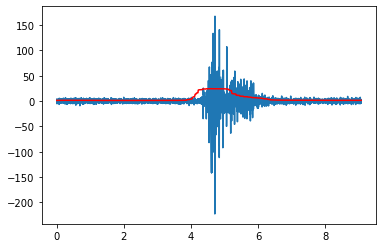

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

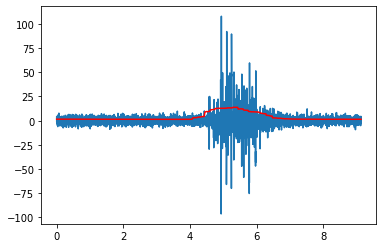

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

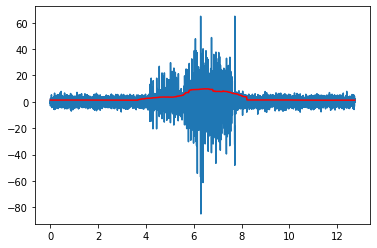

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

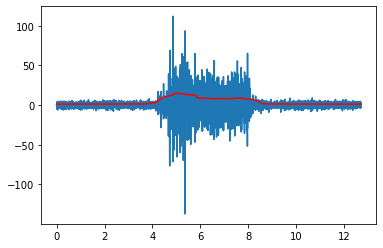

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

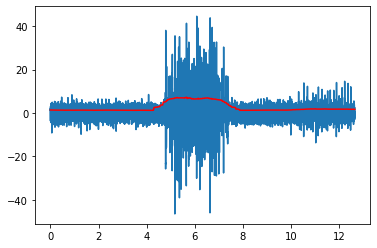

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

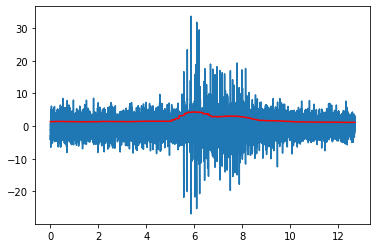

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

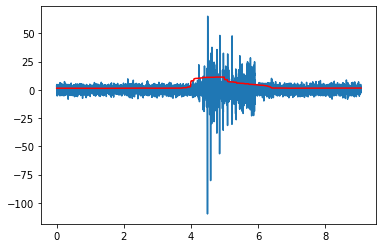

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

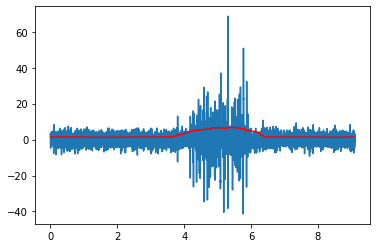

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

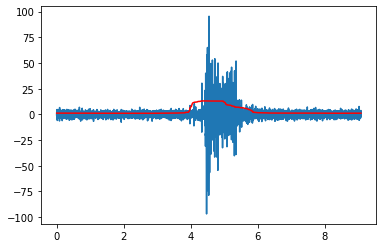

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

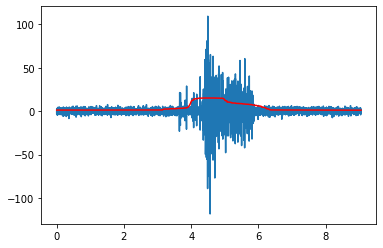

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

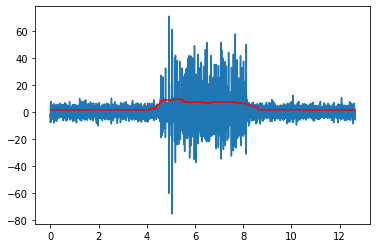

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

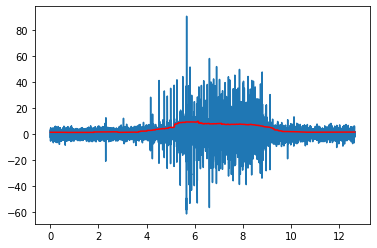

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

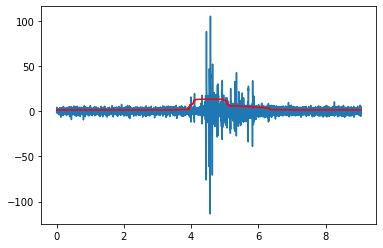

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

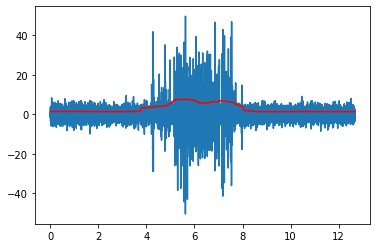

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

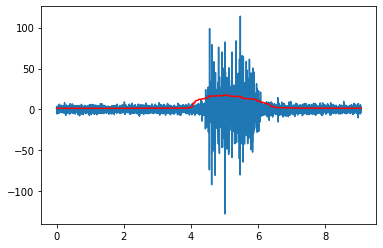

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

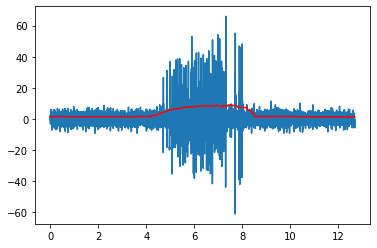

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

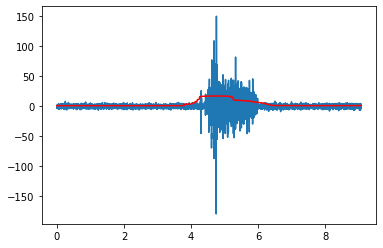

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

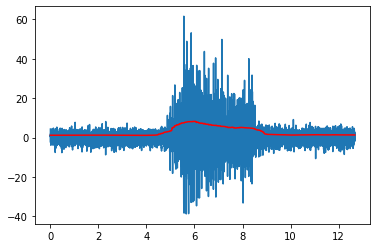

<IPython.core.display.Javascript object>

In [ ]:
#teste
ysd = plotar_grafico_emg_sd("MA1", selecionar(df_dict[13], movementx= "point"), dados13)